In [1]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#讀檔案

In [3]:
TW100 = pd.read_excel("TW100NMB.xlsx")#Taiwan100 Stock Price Data

In [36]:
TW100Y = pd.read_excel("TW100Y.xlsx")#預測KD用

In [5]:
X_Test = pd.read_excel("Test_X.xlsx")

In [6]:
Y_Test = pd.read_excel("Test_Y.xlsx")

In [7]:
#處理一下

In [60]:
TW100.shape

(34500, 17)

In [61]:
TW100Y.shape

(31500, 11)

In [62]:
X_Test.shape

(17250, 16)

In [63]:
Y_Test.shape

(15750, 9)

In [8]:
TW100NT = TW100.drop(["年月日","市值(百萬元)","當日均價(元)"] ,axis=1)

In [9]:
X_TestSP = X_Test.drop(["年月日","當日均價(元)"] ,axis=1)

In [10]:
X_Train_SP = TW100NT.values

In [11]:
X_Test_SP = X_TestSP.values 

In [12]:
L = [];

In [13]:
for j in range(0,34500,345):
    for i in range(315):
        a = X_Train_SP[(i+j):(i+j+30)];
        L.append(a);
    L

In [15]:
x_train = np.reshape(L,(31500,30,14,1))#X裡面沒放漲跌

In [86]:
type(x_train)

numpy.ndarray

In [16]:
M = []

In [17]:
for j in range(0,17250,345):
    for i in range(315):
        a = X_Test_SP[(i+j):(i+j+30)];
        M.append(a);
    M

In [18]:
x_test = np.reshape(M,(15750,30,14,1))

In [64]:
x_test.shape

(15750, 30, 14, 1)

In [82]:
type(x_test)

numpy.ndarray

In [19]:
#處理答案

In [22]:
TW100Y.head()

,7DaysRR,7DaysMAXP-30thCP,7DaysMAXP-1stOP,7DaysMINP-30thCP,7DaysMINP-1stOP,預測最大漲幅,預測最大跌幅,RSV,K值,D值,股價漲跌
0,1.084176,0.88,0.92,0.42,0.46,2.847416,-0.990405,0.907631,0.922902,0.892995,0.20
1,-0.520979,0.69,0.64,0.19,0.14,1.963793,-1.841056,1.000000,0.948601,0.911530,0.25
2,-0.343474,0.46,0.41,-0.09,-0.14,1.249238,-2.528946,0.895522,0.930908,0.917989,0.10
3,-0.477533,0.37,0.37,-0.18,-0.18,1.125989,-2.647596,0.536232,0.799349,0.878443,-0.30
4,-0.220389,0.60,0.47,0.09,-0.04,1.436430,-2.231051,0.616667,0.738455,0.831780,0.20


In [37]:
Y_train_7DRR = TW100Y["股價漲跌"]

In [38]:
y_train = Y_train_7DRR.values

In [25]:
Y_test_7DRR = Y_Test["股價漲跌"]

In [26]:
y_test = Y_test_7DRR.values

In [27]:
#看看答案

In [28]:
from scipy import stats

In [39]:
stats.describe(y_test)

DescribeResult(nobs=15750, minmax=(-11.5, 11.5), mean=0.020443174603174605, variance=0.57666916671796742, skewness=0.7628738158831643, kurtosis=32.31800203188507)

(array([     0.,      0.,      0.,      0.,  14014.,   3694.,  13792.]),
 array([-5, -4, -3, -2, -1,  0,  1,  2]),
 <a list of 7 Patch objects>)

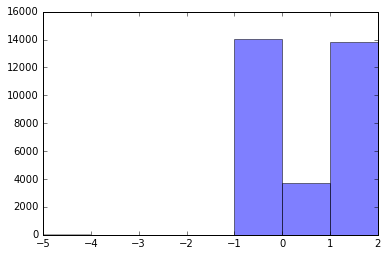

In [47]:
%matplotlib inline
#開始觀察資料決定區間
bins = np.arange(-5, 3, 1)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [40]:
#Catogorize y_train
y_train[(y_train<0)] = -1
y_train[(y_train==0)] = 0
y_train[(y_train>0)] = 1

In [45]:
#Catogorize y_train
y_test[(y_test<0)] = -1
y_test[(y_test==0)] = 0
y_test[(y_test>0)] = 1

In [66]:
y_test_trans.shape

(15750, 3)

In [48]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,3)
y_test_trans = np_utils.to_categorical(y_test,3)

Using TensorFlow backend.


### Build the model

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adadelta,SGD,Adam

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(10, (4, 4), padding='same', activation='relu', input_shape=(30,14,1)))

In [52]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [54]:
model.add(Dense(y_train_trans.shape[1], activation='softmax'))

In [55]:
#model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics = ["accuracy"])

In [56]:
adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss="mse",optimizer=adam, metrics=['accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 14, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 7, 10)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 7, 20)         3220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 3, 120)         38520     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 120)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 360)               0         
__________

In [58]:
model.fit(x_train, y_train_trans, batch_size=2, epochs=1, validation_data=(x_test, y_test_trans))

Train on 31500 samples, validate on 15750 samples
Epoch 1/1
31500/31500 [==============================] - 56s - loss: nan - acc: 0.1184 - val_loss: nan - val_acc: 0.1020


In [79]:
y_test_trans.shape

(15750, 3)

In [67]:
score = model.evaluate(x_test, y_test_trans)
score

15584/15750 [============================>.] - ETA: 0s

[nan, 0.10196825396825397]

In [68]:
pick = np.random.randint(1,15750, 20)

In [81]:
model.predict(x_test, batch_size=32, verbose=0).shape

(15750, 3)

In [69]:
result = model.predict_classes(x_test)

15648/15750 [============================>.] - ETA: 0s

In [73]:
result.shape

(15750,)

In [70]:
from ipywidgets import interact_manual

In [71]:
def identify(testnumber):
    print(testnumber);
    print("神經網路判斷為：",result[testnumber]);
    print("正確答案是:",y_test_trans[testnumber]);

In [72]:
interact_manual(identify, testnumber=(0,15449))

11298
神經網路判斷為： 0
正確答案是: [ 0.  1.  0.]
